D’autres cas d’utilisation peuvent être :

- Saisie automatique de données pour des documents d’entreprise, par exemple : formulaires papier, chèques, passeports, factures, relevés bancaires, reçus, etc ;
- Reconnaissance automatique des plaques d’immatriculation ;
 - Reconnaissance des passeports de voyageurs dans un aéroport et l’extraction de l’information importante ;
- Extraction automatique d’informations clés dans des documents d’assurance ;
- Extraction des informations de carte d’affaires ;
- Numérisation de gros documents imprimés, par exemple des livres ;
Rendre disponible à la recherche le texte d’images des documents imprimés ;
- Conversion de l’écriture manuscrite en temps réel pour contrôler un ordinateur (pen computing – via une tablette graphique ou un écran tactile par exemple).

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import cv2
import os
import matplotlib.pyplot as plt
import random
from sklearn.svm import SVC
import cv2
import numpy as np
from pytesseract import * 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


from resize_photo import *

np.set_printoptions(precision=  3,suppress=True)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

%matplotlib widget


2024-04-05 12:45:11.357737: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-05 12:45:12.706286: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

# Définition du répertoire principal contenant les sous-répertoires pour chaque caractère
main_dir = "alphabet_resize/"
size =[desired_width,desired_height]


In [3]:
# Charger les données d'entraînement et de test
def load_data(main_directory, size):
    data = []  # Liste pour stocker les images
    labels = []  # Liste pour stocker les étiquettes
    # Parcourir les répertoires de chaque caractère
    for character_dir in os.listdir(main_directory):
        character_dir_path = os.path.join(main_directory, character_dir)
        if os.path.isdir(character_dir_path):
            # Parcourir les fichiers d'images dans le répertoire du caractère
            for i, filename in enumerate(os.listdir(character_dir_path)):
                image_number = i + 1  # Commencer à partir de 1
                if image_number > 30:  # Limiter le nombre d'images à 30 par caractère
                    break
                image_path = os.path.join(character_dir_path, filename)
                # Lire l'image en niveaux de gris et la redimensionner à la taille spécifiée
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                image = cv2.resize(image, size)
                # Ajouter l'image et l'étiquette correspondante aux listes
                data.append(image)
                labels.append(character_dir)
    # Convertir les listes en tableaux numpy et les retourner
    return np.array(data), np.array(labels)


In [4]:
# Fonction pour charger et prétraiter une image
def preprocess_image(image_, size):
    # image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = image_  # Prendre l'image en entrée

    # Redimensionner l'image à la taille spécifiée
    image = cv2.resize(image, size)

    # Normaliser l'image (optionnel)
    # image = image / 255.0

    # Mettre en forme l'image pour le modèle CNN
    preprocessed_image = image.reshape(1, size[0], size[1], 1)

    # Retourner l'image prétraitée
    return preprocessed_image


In [5]:

train_data, train_labels = load_data(main_dir,size)
# Diviser les données en train_data et test_data, train_labels et test_labels
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)


In [6]:
# Entraînement du modèle SVM
svm_model = SVC(kernel='linear')  # Création d'une instance de modèle SVM avec un noyau linéaire
# Vous pouvez ajuster le noyau et d'autres hyperparamètres selon les besoins

# Entraîner le modèle sur les données d'entraînement
svm_model.fit(train_data.reshape(-1, size[0]*size[1]), train_labels)

# Évaluer le modèle sur l'ensemble de test
accuracy = svm_model.score(test_data.reshape(-1, size[0]*size[1]), test_labels)
print("Test Accuracy:", accuracy)  # Afficher la précision du modèle sur l'ensemble de test


Test Accuracy: 0.9810126582278481


### prediction d'une image aleatoire dans Test data

In [7]:
element_index = random.randint(0, len(test_data) - 1)  # Indice de l'élément que vous souhaitez prédire
element = test_data[element_index].reshape(1, -1)  # Reshape l'élément pour le rendre 2D

# Prédiction avec le modèle SVM
prediction = svm_model.predict(element)

# Obtention du vrai label correspondant
true_label = test_labels[element_index]

# Affichage de la prédiction et du vrai label
print("Prédiction:", prediction)
print("Vrai Label:", true_label)

Prédiction: ['h']
Vrai Label: h


## Avec OCR normal 

Recuperer les images des différentes repertoires

In [8]:

# Chemin du répertoire contenant les images
image_test_nouv_dir = "camera_image_nouveau/"

# Liste pour stocker les images en RGB
images_nouveau_rgb = []

# Noms des images à importer
image_names = ["img1.png", "img2.png", "img4.png"]

# Parcourir les noms d'images et les importer manuellement
for image_name in image_names:
    # Chemin complet vers le fichier
    image_path = os.path.join(image_test_nouv_dir, image_name)
    
    # Lire l'image en couleur (RGB)
    image_rgb = cv2.imread(image_path)
    
    # Vérifier si l'image a été lue correctement
    if image_rgb is not None:
        # Ajouter l'image RGB à la liste
        images_nouveau_rgb.append(image_rgb)
    else:
        print(f"Erreur lors de la lecture de l'image {image_name}")

# Vérifier le nombre d'images importées
print("Nombre d'images importées:", len(images_nouveau_rgb))

Nombre d'images importées: 3


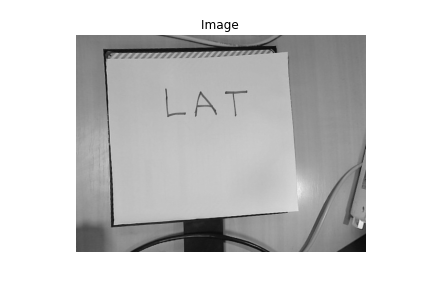

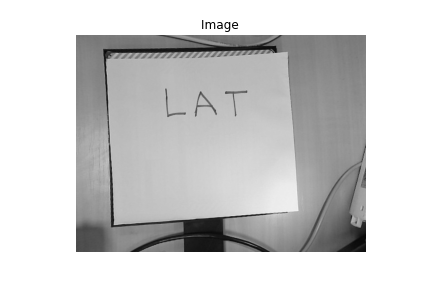

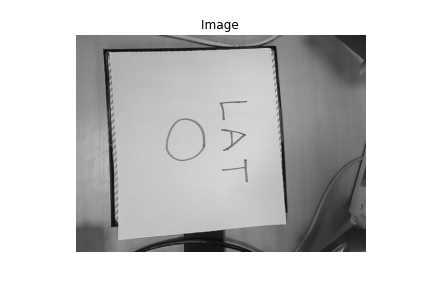

In [9]:
for image in images_nouveau_rgb:
    # Pour chaque image dans la liste
    plt.figure()  # Crée une nouvelle figure matplotlib
    plt.imshow(image)  # Affiche l'image actuelle dans la figure
    plt.title('Image ')  # Définit un titre pour la figure
    plt.axis('off')  # Désactive les axes x et y dans la figure
    plt.show()  # Affiche la figure actuelle


In [10]:

# Chemin vers l'exécutable de Tesseract (par défaut sur Ubuntu)
pytesseract.tesseract_cmd = '/usr/bin/tesseract'


# avec librairie OCR  avec traitement 

dans cette partie je travaille uniquement avec les images qui ont eté prises par la caméra en noir et blanc 
 - j'utilise dans un premier temps les outils de traitement d'images pour épurer les images 

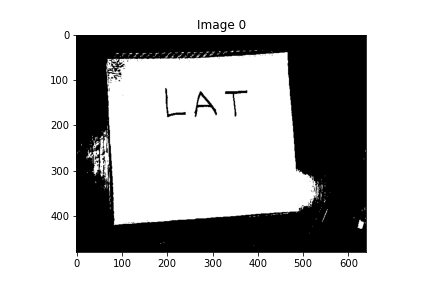

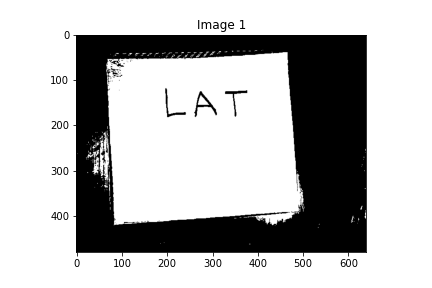

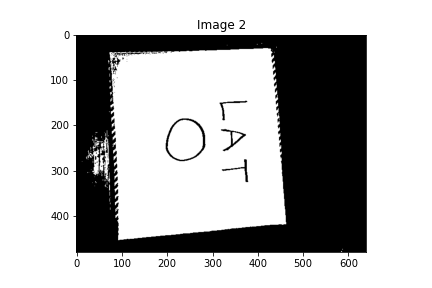

In [11]:
images_thresolded=[]

for idx, image in enumerate(images_nouveau_rgb):
    # Faire une copie de l'image
    image_copy = image.copy()

    plt.figure()
    # Convertir en niveaux de gris
    gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Appliquer un seuillage avec un seuil haut
    _, thresholded = cv2.threshold(gray, 175, 255, cv2.THRESH_BINARY)

    images_thresolded.append(thresholded)

    # Afficher l'image avec les contours
    plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_BGR2RGB))

    plt.title(f'Image {idx}')
    plt.show()


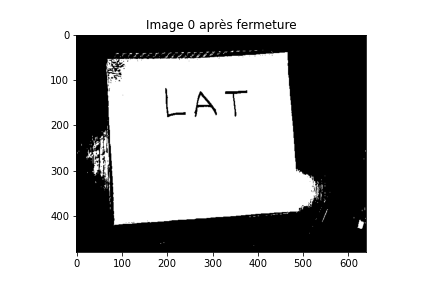

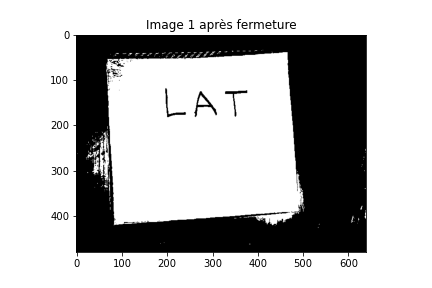

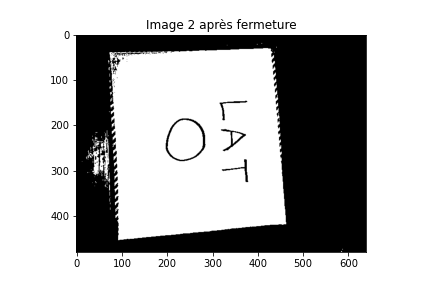

In [12]:

images_closed = []

for idx, thresholded in enumerate(images_thresolded):
    # Appliquer une opération de fermeture
    kernel = np.ones((1,1 ), np.uint8)
    closing = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)
    images_closed.append(closing)

    # Afficher l'image avec l'opération de fermeture
    plt.figure()
    plt.imshow(closing, cmap='gray')
    plt.title(f'Image {idx} après fermeture')
    plt.show()



    

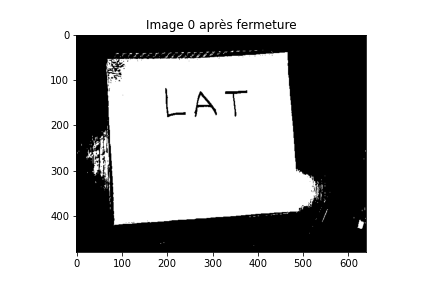

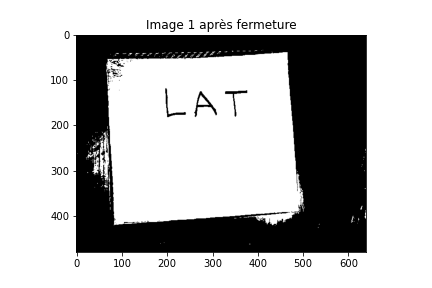

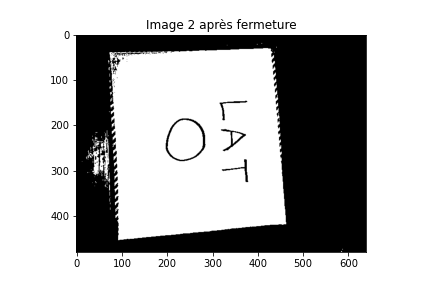

In [13]:

images_closed = []

for idx, thresholded in enumerate(images_thresolded):
    # Appliquer une opération de fermeture
    kernel = np.ones((1,1 ), np.uint8)
    closing = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)
    images_closed.append(closing)

    # Afficher l'image avec l'opération de fermeture
    plt.figure()
    plt.imshow(closing, cmap='gray')
    plt.title(f'Image {idx} après fermeture')
    plt.show()

In [14]:
# Liste pour stocker les images rognées
images_traités = []

# Rogner toutes les images dans images_closed
for image in images_closed:
    # Rogner l'image suivant les coordonnées spécifiées de la zone de travail
    cropped_image = image[100:400, 150:390]
    # Ajouter l'image rognée à la liste
    images_traités.append(cropped_image)

LAT



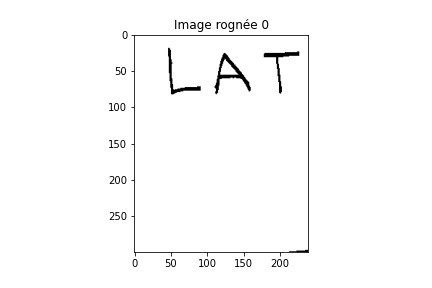

LAT



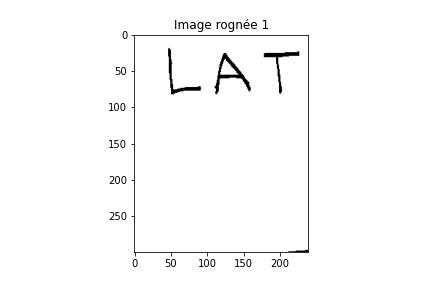

LAT



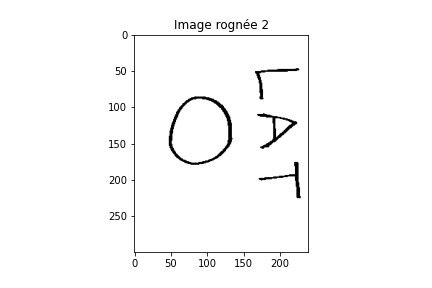

In [15]:
# Afficher les images rognées
for idx, cropped_image in enumerate(images_traités):
    text = pytesseract.image_to_string(cropped_image)
    print(text)
    plt.figure()
    plt.imshow(cropped_image, cmap='gray')  # Utilisez 'gray' si les images sont en niveaux de gris
    plt.title(f"Image rognée {idx}")
    plt.show()

## utiliser OCR Knn pour detecter les lettres

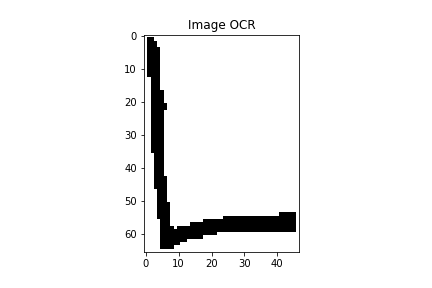

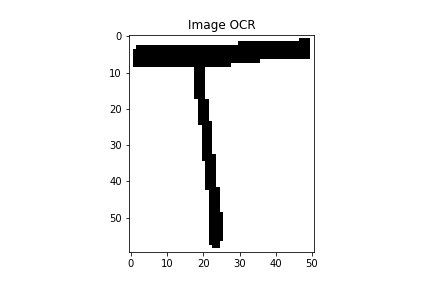

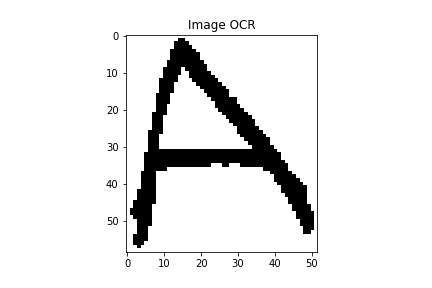

le mot est 68TL


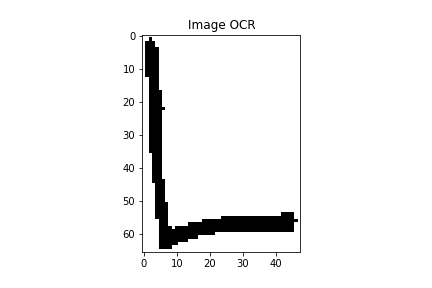

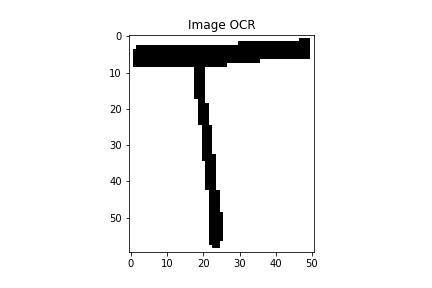

/tmp/ipykernel_10881/1920087453.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


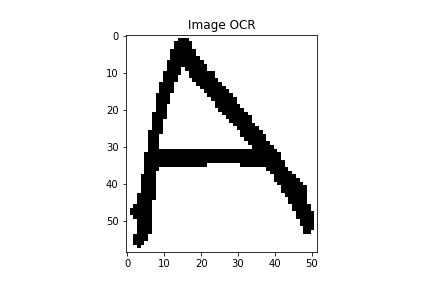

le mot est 68TL


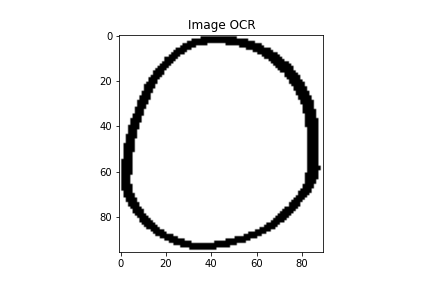

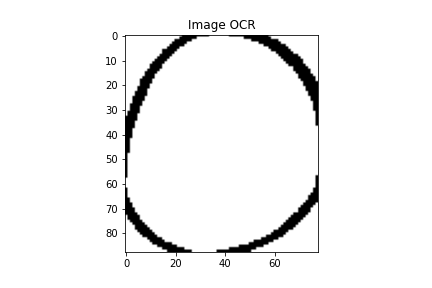

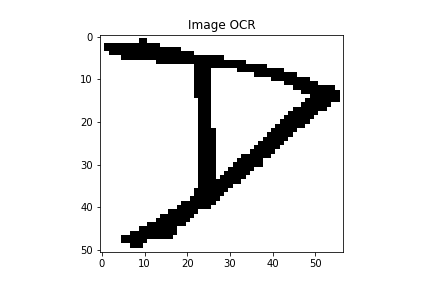

le mot est ?%J


In [16]:
# Parcourir chaque image dans images_traités
for image in images_traités:
    # Prétraiter l'image en trouvant les contours
    contours, _ = cv2.findContours(image, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

    # Définir une taille minimale pour les caractères
    min_area = 500  # Ajuster cette valeur selon la taille minimale attendue des caractères
    max_area = 7700  # Ajuster cette valeur selon la taille minimale attendue des caractères
    detected_chars = []  # Initialiser une liste pour stocker les caractères détectés dans l'image

    # Parcourir chaque contour trouvé dans l'image
    for contour in contours:
        # Calculer la surface du contour
        area = cv2.contourArea(contour)
        # Vérifier si la surface du contour dépasse la taille minimale attendue
        if area > min_area and area < max_area:
            # Extraire les coordonnées du rectangle englobant du contour
            x, y, w, h = cv2.boundingRect(contour)
            # Ajouter les coordonnées du rectangle englobant à la liste des caractères détectés
            detected_chars.append((x, y, w, h))

    # Trier les caractères détectés en fonction de leurs coordonnées y, puis x
    detected_chars = sorted(detected_chars, key=lambda char: (char[1], char[0]))

    # Copier l'image pour dessiner les rectangles autour des caractères détectés
    image_copy = image.copy()

    predicted_Word = []  # Initialiser une liste pour stocker les prédictions de chaque caractère

    # Parcourir chaque caractère détecté
    for (x, y, w, h) in detected_chars:
        # Extraire la région d'intérêt (ROI) à partir de l'image copiée
        roi_ = image_copy[y:y+h, x:x+w]

        # Prétraiter la ROI pour la passer à votre modèle de classification (svm_model)
        roi = preprocess_image(roi_, size)

        # Aplatir la ROI pour qu'elle soit compatible avec svm_model.predict()
        roi_reshaped = roi.reshape(-1, size[0] * size[1])

        # Faire une prédiction sur la ROI à l'aide du modèle de classification (svm_model)
        prediction_roi = svm_model.predict(roi_reshaped)
        predicted_Word.append(prediction_roi[0])  # Ajouter la prédiction à la liste des prédictions

        # Afficher l'image de la ROI (avec érosion)
        plt.figure()
        plt.imshow(roi_, cmap='gray')
        plt.title(f"Image OCR")
        plt.show()  # Afficher l'image

    # Concaténer les prédictions pour former un mot
    word = ''.join(predicted_Word[::-1])
    print('le mot est', word)  # Afficher le mot détecté
